In [124]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [125]:
from load_data import load_CIFAR10

cifar10_dir = "cifar-10-batches-py"


try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_tra, y_tra, X_te, y_te = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_tra.shape)
print('Training labels shape: ', y_tra.shape)
print('Test data shape: ', X_te.shape)
print('Test labels shape: ', y_te.shape)

Clear previously loaded data.
Training data shape:  (50000, 3, 32, 32)
Training labels shape:  (50000,)
Test data shape:  (10000, 3, 32, 32)
Test labels shape:  (10000,)


In [126]:
import numpy as np

X_val = X_tra[40000:]
y_val = y_tra[40000:]
X_tra = X_tra[:40000]
y_tra = y_tra[:40000]


mini_batch = 625
X_tra =  np.array(np.vsplit(X_tra,X_tra.shape[0]/mini_batch))
y_tra =  np.array(np.split(y_tra,y_tra.shape[0]/mini_batch))
X_val =  np.array(np.vsplit(X_val,X_val.shape[0]/mini_batch))
y_val =  np.array(np.split(y_val,y_val.shape[0]/mini_batch))
X_te =  np.array(np.vsplit(X_te,X_te.shape[0]/mini_batch))
y_te =  np.array(np.split(y_te,y_te.shape[0]/mini_batch))

In [127]:
import torch
classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_train = torch.from_numpy(X_tra)
y_train = torch.from_numpy(y_tra)
X_vali = torch.from_numpy(X_val)
y_vali = torch.from_numpy(y_val)
X_test = torch.from_numpy(X_te)
y_test = torch.from_numpy(y_te)

X_val = X_train[40000 : ]
y_val = y_train[40000 : ]


N,B,C,H,W=X_train.shape
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Training data shape: ', X_vali.shape)
print('Training labels shape: ', y_vali.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  torch.Size([64, 625, 3, 32, 32])
Training labels shape:  torch.Size([64, 625])
Training data shape:  torch.Size([16, 625, 3, 32, 32])
Training labels shape:  torch.Size([16, 625])
Test data shape:  torch.Size([16, 625, 3, 32, 32])
Test labels shape:  torch.Size([16, 625])


In [5]:
print(X_train[0][0])


tensor([[[ 59.,  43.,  50.,  ..., 158., 152., 148.],
         [ 16.,   0.,  18.,  ..., 123., 119., 122.],
         [ 25.,  16.,  49.,  ..., 118., 120., 109.],
         ...,
         [208., 201., 198.,  ..., 160.,  56.,  53.],
         [180., 173., 186.,  ..., 184.,  97.,  83.],
         [177., 168., 179.,  ..., 216., 151., 123.]],

        [[ 62.,  46.,  48.,  ..., 132., 125., 124.],
         [ 20.,   0.,   8.,  ...,  88.,  83.,  87.],
         [ 24.,   7.,  27.,  ...,  84.,  84.,  73.],
         ...,
         [170., 153., 161.,  ..., 133.,  31.,  34.],
         [139., 123., 144.,  ..., 148.,  62.,  53.],
         [144., 129., 142.,  ..., 184., 118.,  92.]],

        [[ 63.,  45.,  43.,  ..., 108., 102., 103.],
         [ 20.,   0.,   0.,  ...,  55.,  50.,  57.],
         [ 21.,   0.,   8.,  ...,  50.,  50.,  42.],
         ...,
         [ 96.,  34.,  26.,  ...,  70.,   7.,  20.],
         [ 96.,  42.,  30.,  ...,  94.,  34.,  34.],
         [116.,  94.,  87.,  ..., 140.,  84.,  72.]]]

In [128]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3 , 10 ,5) #, padding='valid', input_shape=(C,H,W), activation='relu')
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20 , 5 ) #,padding='valid', input_shape=(20,H-5+1,W-5+1), activation='relu')
        self.fc1 = nn.Linear(500, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 500)
        #x = x.long()
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

net.to(device)

Net(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [137]:
import torch.optim as optim
import random
criterion = nn.CrossEntropyLoss()

# learning rate 값 찾기
power = random.uniform(-3,-6)


learning_rate = 10 ** power
moment = 0.99

optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.99)
optimizer.zero_grad()

print(learning_rate)
print(optimizer)

7.041174241789824e-05
SGD (
Parameter Group 0
    dampening: 0
    lr: 7.041174241789824e-05
    momentum: 0.99
    nesterov: False
    weight_decay: 0
)


In [138]:

for epoch in range(100):   # 데이터셋을 수차례 반복합니다.
    
    total_tra = 0
    correct_tra = 0
    running_loss = 0.0
    # train 데이터 이용한 학습
    for i in range(X_train.shape[0]):
        inputs = X_train[i].to(device)
        labels = y_train[i].to(device)

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        outputs = net(inputs)
        
        _, predicted = torch.max(outputs.data, 1)
        total_tra += labels.shape[0]
        correct_tra += (predicted == labels).sum().item()
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 8 == 7:    # print every 2000 mini-batches
            #print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss /batch_size))
            running_loss = 0.0
            
    total_val = 0
    correct_val = 0
    for i in range(X_vali.shape[0]):
        inputs = X_vali[i].to(device)
        labels = y_vali[i].to(device)
        
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_val += labels.shape[0]
        correct_val += (predicted == labels).sum().item()
    print("val acurr : ", correct_val/total_val ,end = " // ")
    print("train acurr : ", correct_tra/total_tra ,end = " // ")
    print("learning rate : ", learning_rate)
print('Finished Training')

val acurr :  0.3813 // train acurr :  0.37145 // learning rate :  7.041174241789824e-05
val acurr :  0.4148 // train acurr :  0.3957 // learning rate :  7.041174241789824e-05
val acurr :  0.4313 // train acurr :  0.415975 // learning rate :  7.041174241789824e-05
val acurr :  0.4438 // train acurr :  0.4295 // learning rate :  7.041174241789824e-05
val acurr :  0.4554 // train acurr :  0.450325 // learning rate :  7.041174241789824e-05
val acurr :  0.4717 // train acurr :  0.46435 // learning rate :  7.041174241789824e-05
val acurr :  0.4714 // train acurr :  0.477975 // learning rate :  7.041174241789824e-05
val acurr :  0.4899 // train acurr :  0.487175 // learning rate :  7.041174241789824e-05
val acurr :  0.4974 // train acurr :  0.50035 // learning rate :  7.041174241789824e-05
val acurr :  0.5036 // train acurr :  0.510825 // learning rate :  7.041174241789824e-05
val acurr :  0.5123 // train acurr :  0.522775 // learning rate :  7.041174241789824e-05
val acurr :  0.5147 // train

val acurr :  0.6173 // train acurr :  0.723625 // learning rate :  7.041174241789824e-05
val acurr :  0.614 // train acurr :  0.73145 // learning rate :  7.041174241789824e-05
val acurr :  0.6091 // train acurr :  0.73455 // learning rate :  7.041174241789824e-05
val acurr :  0.6158 // train acurr :  0.7311 // learning rate :  7.041174241789824e-05
val acurr :  0.6093 // train acurr :  0.729375 // learning rate :  7.041174241789824e-05
val acurr :  0.6168 // train acurr :  0.726325 // learning rate :  7.041174241789824e-05
val acurr :  0.6101 // train acurr :  0.728 // learning rate :  7.041174241789824e-05
Finished Training


In [116]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


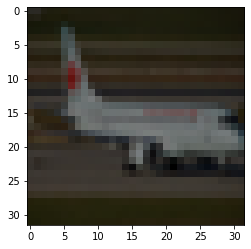

ans :  plane


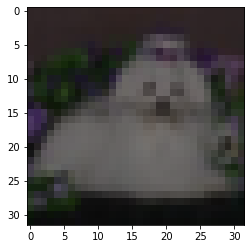

ans :  dog
predict : plane dog


In [139]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    #npimg = img.numpy()
    #print(img)
    plt.imshow(np.transpose(img.astype("int"), (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
images=[]
for k in range(2):
    i = random.randint(1,64)
    j = random.randint(1,625)
    images.append(X_tra[i][j])
    imshow(X_tra[i][j])
    print("ans : ",classes[y_tra[i][j]])

images=torch.tensor(images).to(device)
output = net(images)
_, predicted = torch.max(output, 1)
print("predict :" ,classes[predicted[0]],classes[predicted[1]])



In [140]:
correct = 0
total = 0
with torch.no_grad():
    for i in range(X_test.shape[0]):
        images = X_test[i].to(device)
        labels = y_test[i].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.shape[0]
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 60.320000 %


In [141]:
class_correct = np.zeros(10)
class_total = np.zeros(10)
with torch.no_grad():
    for i in range(X_test.shape[0]):
        images = X_test[i].to(device)
        labels = y_test[i].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        for j in range(labels.shape[0]):
            class_total[labels[j]] += 1
            if labels[j] == predicted[j]:
                class_correct[labels[j]] += 1

for i in range(10):         
    print("class : ",classes[i] , " // ", "acur : " ,class_correct[i]/class_total[i])


class :  plane  //  acur :  0.639
class :  car  //  acur :  0.808
class :  bird  //  acur :  0.473
class :  cat  //  acur :  0.466
class :  deer  //  acur :  0.59
class :  dog  //  acur :  0.527
class :  frog  //  acur :  0.679
class :  horse  //  acur :  0.568
class :  ship  //  acur :  0.731
class :  truck  //  acur :  0.551
